> ## ****Week 3: Feature Engineering and Selection****

In [171]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [172]:
pwd

'C:\\Users\\Andy Joseph\\Documents\\3Signet\\Feature Engineering & Selection'

In [173]:
df = pd.read_csv('students_dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [174]:
df.shape

(4424, 37)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [176]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# ****1. Feature Creation****

> ## ****I. Developing New Features****

> #### ****a. Develop new features based on domain knowledge (e.g., study time per credit)****

In [177]:
# "study time per credit" 

df['study_time_per_credit'] = (
    (df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']) /
    (df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)'])
)
df['study_time_per_credit'].head()

0         NaN
1    1.000000
2         inf
3    0.666667
4    0.800000
Name: study_time_per_credit, dtype: float64

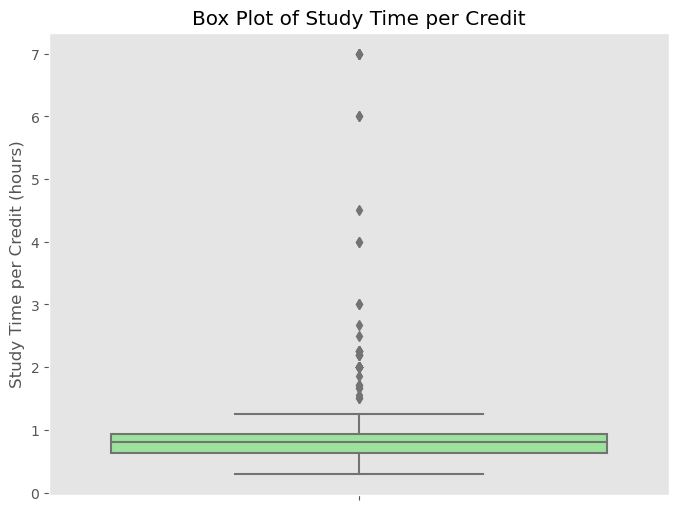

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the box plot
sns.boxplot(y=df['study_time_per_credit'], color='lightgreen')

# Adding labels and title
plt.ylabel('Study Time per Credit (hours)')
plt.title('Box Plot of Study Time per Credit')
plt.grid(axis='y')

# Display the plot
plt.show()

>
The box plot of study time per credit reveals that most students study between andto 2 hours per credit, with a mediaof n around 1 hour. Outliers indicate some students are studying significantly more, suggesting variability in study habit.


> #### ****b. Performance Ratio: Create a ratio of approved curricular units to enrolled curricular units to measure academic success****

In [179]:
df['performance_ratio'] = (
    (df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']) / 
    (df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)'])
)
df['performance_ratio'].head()

0         NaN
1    1.000000
2    0.000000
3    0.916667
4    0.916667
Name: performance_ratio, dtype: float64

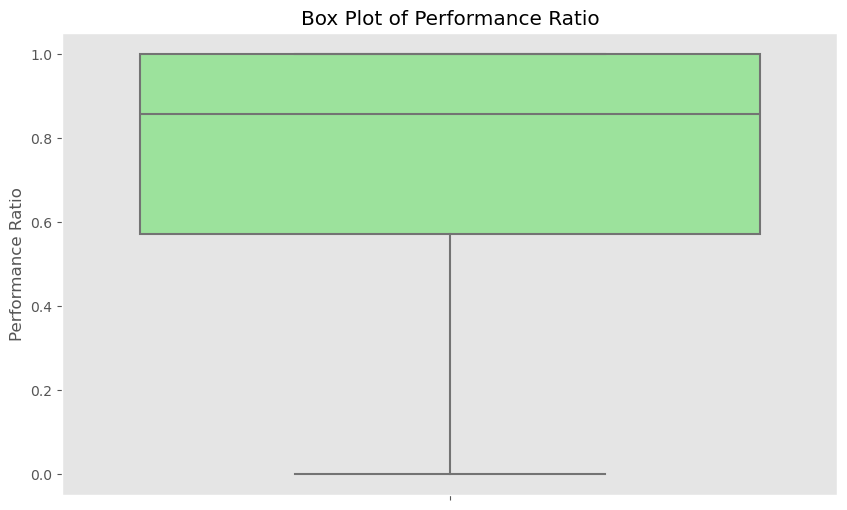

In [180]:
import seaborn as sns

# Create a box plot for performance ratio
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['performance_ratio'], color='lightgreen')
plt.ylabel('Performance Ratio')
plt.title('Box Plot of Performance Ratio')
plt.grid(axis='y')
plt.show()

>  A performance ratio close to 1 indicates that a student is successfully completing nearly all of their enrolled courses, whil  a ratio significantly below 1 suggests challenges in course completion.
>
>The box plot of performance ratios indicates that most students achieve a median ratio of approximately 0.8, reflecting strong academic performance.

****c. Dropout Risk: You could create a "dropout risk score" based on variables like age, GPA, scholarship status, or whether tuition fees are current.****

In [181]:
df['dropout_risk'] = df['Debtor'] * (1 - df['Tuition fees up to date'])
df['dropout_risk'].head()

0    0
1    0
2    0
3    0
4    0
Name: dropout_risk, dtype: int64

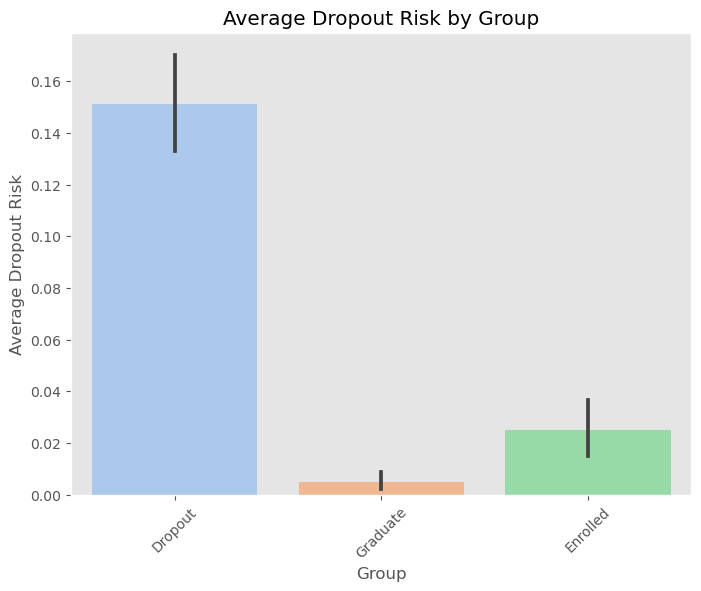

In [182]:
# Example: Assuming 'group' is a categorical variable in your DataFrame
plt.figure(figsize=(8, 6))
sns.barplot(x='Target', y='dropout_risk', data=df, palette='pastel')

plt.xlabel('Group')
plt.ylabel('Average Dropout Risk')
plt.title('Average Dropout Risk by Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

>The analysis of average dropout risk reveals that dropouts face a significantly high risk (approximately 0.14), indicating serious underlying issues. In contrast, graduates show minimal dropout risk (around 0.02), while enrolled students have a low risk of about 0.04. This disparity highlights the need for targeted support for at-risk students and the importance of understanding factors that contribute to successful outcomes

## ****II. Interaction Features****

> #### ****a. Financial Interaction: Interaction between Scholarship holder and Tuition fees up to date could indicate if students with scholarships tend to pay their tuition on time.****

In [183]:
df['scholarship_fee_status'] = df['Scholarship holder'] * df['Tuition fees up to date']
df['scholarship_fee_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: scholarship_fee_status, dtype: int64

In [184]:
# Count the occurrences of each status
status_counts = df['scholarship_fee_status'].value_counts()
status_counts

scholarship_fee_status
0    3371
1    1053
Name: count, dtype: int64

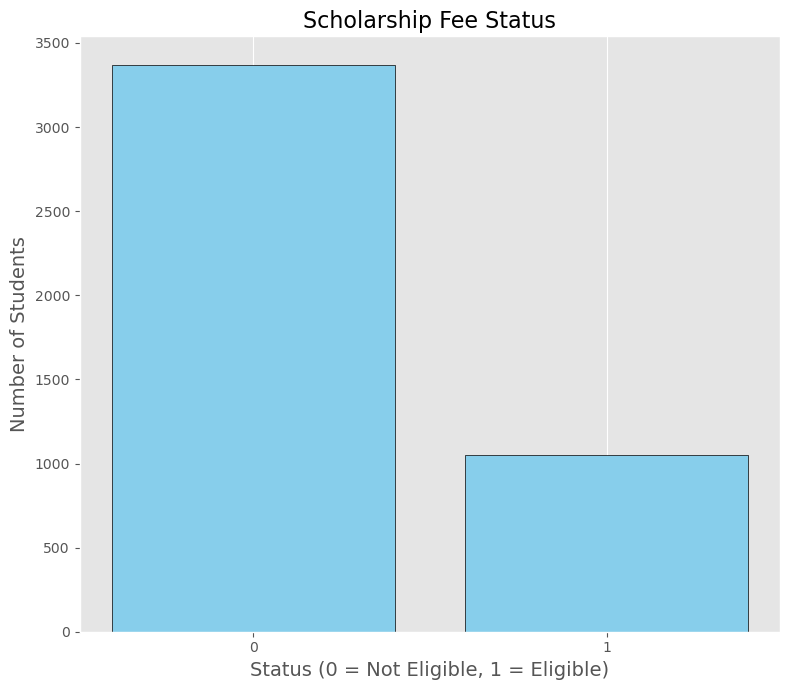

In [185]:
# Plotting the scholarship fee status as a bar chart
plt.figure(figsize=(8, 7))
plt.bar(status_counts.index, status_counts.values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title("Scholarship Fee Status", fontsize=16)
plt.xlabel("Status (0 = Not Eligible, 1 = Eligible)", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)

# Display the chart
plt.xticks(status_counts.index)  # Set x-ticks to the status values
plt.grid(axis='y')
plt.tight_layout()
plt.show()

>The bar chart on "Scholarship Fee Status" highlights that over 3,000 students are classified as "Not Eligible" for scholarships, while only about 1,000 are "Eligible." This significant disparity raises concerns about potential dropout rates, as financial barriers can lead to students leaving their programs.

> ## ****III. Implementing Polynomial Features For Numerical Variables****

### Polynomial Features

Polynomial features are new features created by raising existing numerical variables to different powers (degrees) to capture non-linear relationships between features and the target variable. They can include:

- **Powers**: Each numerical feature is raised to a specified degree (e.g., `x`, `x²`).
- **Interaction terms**: Products of two or more features (e.g., `x1 * x2`).

**Purpose**:
- Capture non-linear patterns in the data.
- Enable simple models (like linear regression) to fit more complex relationships.

**Usage**:
- Select key numerical features (e.g., `Admission grade`, `Age at enrollment`).
- Apply polynomial transformations (e.g., degree 2 creates `x`, `x²`).

**Caution**:
- Can lead to overfitting if the degree is too high.
- Increases model complexity and computational cost.

In [186]:
# Show numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Display the numerical columns
print(numerical_columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [187]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical columns you want to apply polynomial features to
numerical_columns = ['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)',
                     'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
                     'Previous qualification (grade)', 'Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate']

# Extract the numerical data
numerical_data = df[numerical_columns]

# Create polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(numerical_data)

# Get the names of the new polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_columns)

# Create a DataFrame with the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add the polynomial features to the original dataset
data_with_poly = pd.concat([df, poly_df], axis=1)

# Display the first few rows of the dataset with polynomial features
data_with_poly.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Admission grade^2,Admission grade GDP,Admission grade Unemployment rate,Admission grade Inflation rate,GDP^2,GDP Unemployment rate,GDP Inflation rate,Unemployment rate^2,Unemployment rate Inflation rate,Inflation rate^2
0,1,17,5,171,1,1,122.0,1,19,12,...,16205.29,221.502,1374.84,178.22,3.0276,18.792,2.436,116.64,15.12,1.96
1,1,15,1,9254,1,1,160.0,1,1,3,...,20306.25,112.575,1980.75,-42.75,0.6241,10.981,-0.237,193.21,-4.17,0.09
2,1,1,5,9070,1,1,122.0,1,37,37,...,15575.04,217.152,1347.84,174.72,3.0276,18.792,2.436,116.64,15.12,1.96
3,1,17,2,9773,1,1,122.0,1,38,37,...,14304.16,-373.152,1124.24,-95.68,9.7344,-29.328,2.496,88.36,-7.52,0.64
4,2,39,1,8014,0,1,100.0,1,37,38,...,20022.25,111.785,1966.85,-42.45,0.6241,10.981,-0.237,193.21,-4.17,0.09


>## ****IV Developing Time Based Features****

In [188]:
df['progress_rate'] = (
    (df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']) / 
    (df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)'])
)
df['progress_rate'].head()

0         NaN
1    1.000000
2    0.000000
3    0.916667
4    0.916667
Name: progress_rate, dtype: float64

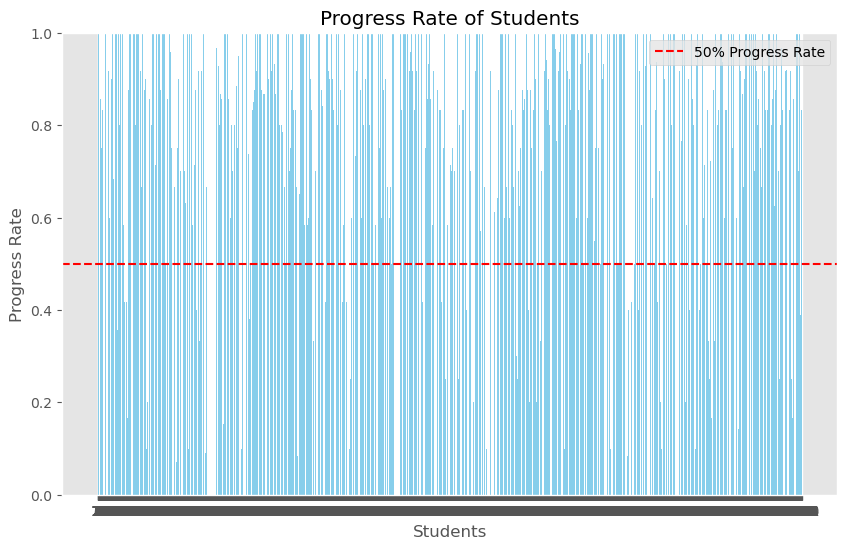

In [189]:
# Plotting the progress rate
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['progress_rate'], color='skyblue')
plt.xlabel('Students')
plt.ylabel('Progress Rate')
plt.title('Progress Rate of Students')
plt.xticks(df.index)  # Set x-ticks to the index of the DataFrame
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (percentage)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Progress Rate')  # Optional: Add a reference line
plt.legend()
plt.grid(axis='y')
plt.show()

# ****2. Feature Transformation****

> #### ****a. Apply log transformation to skewed numerical features****

Column: Marital status, Data: count    4424.000000
mean        1.178571
std         0.605747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Marital status, dtype: float64
Column: Application mode, Data: count    4424.000000
mean       18.669078
std        17.484682
min         1.000000
25%         1.000000
50%        17.000000
75%        39.000000
max        57.000000
Name: Application mode, dtype: float64
Column: Application order, Data: count    4424.000000
mean        1.727848
std         1.313793
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Application order, dtype: float64
Column: Course, Data: count    4424.000000
mean     8856.642631
std      2063.566416
min        33.000000
25%      9085.000000
50%      9238.000000
75%      9556.000000
max      9991.000000
Name: Course, dtype: float64
Column: Daytime/evening attendance	, Data: count    4424.000000
me

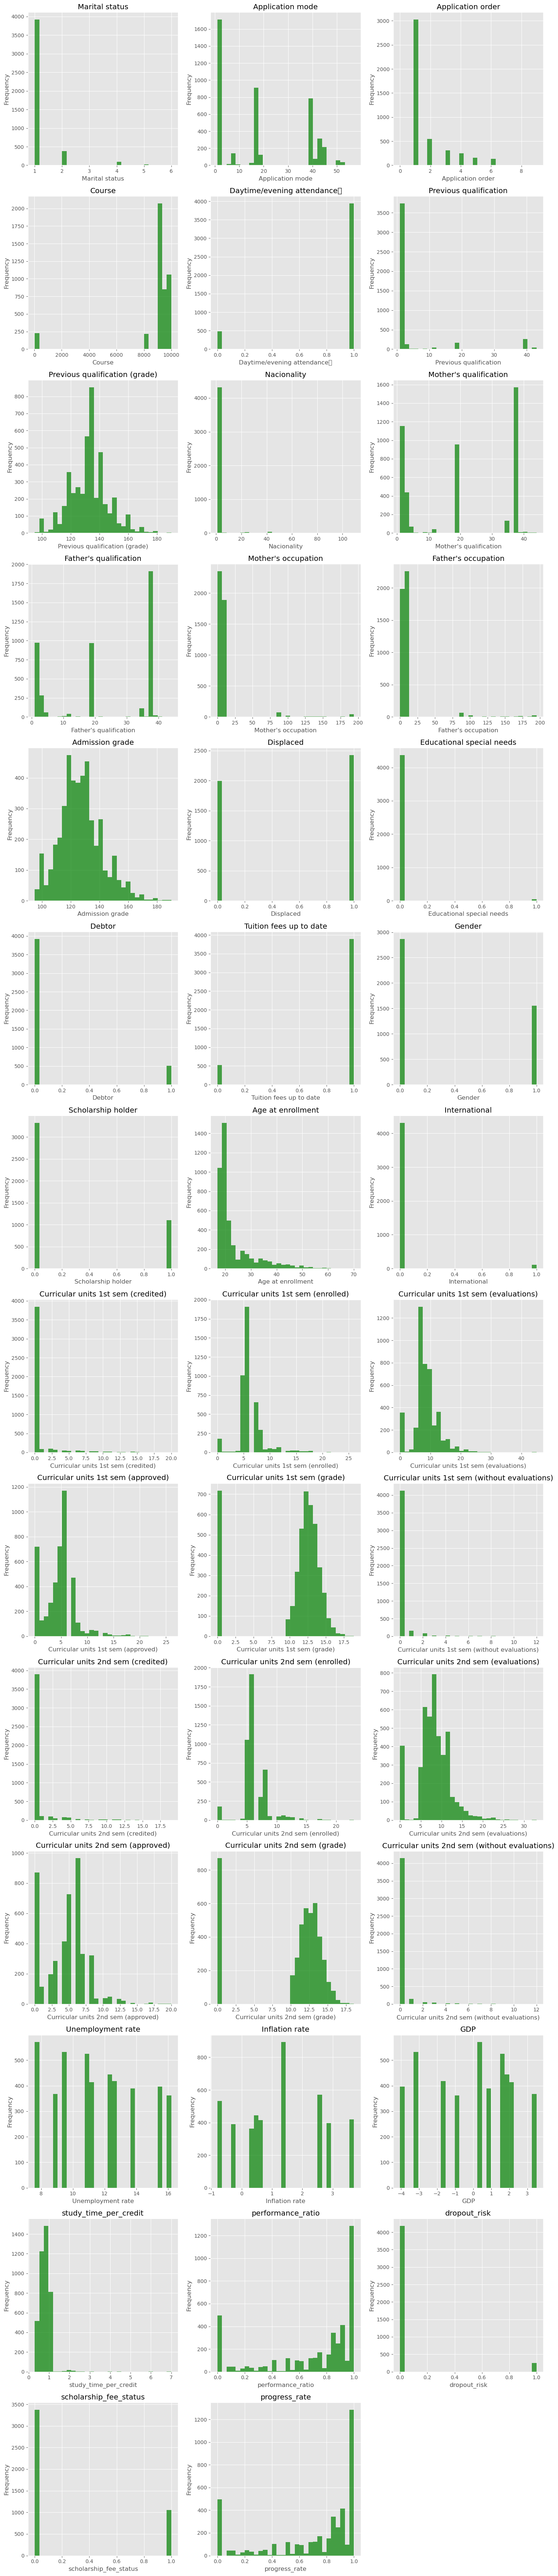

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    # Filter out NaN and infinite values
    data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Debugging output to check the data
    print(f"Column: {col}, Data: {data.describe()}")  # Print summary of data

    if len(data) > 0:  # Check if there's data to plot
        axes[i].hist(data, bins=30, alpha=0.7, color='green')
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].axis('off')  # Hide the axis if no data to plot

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [191]:
import pandas as pd
import numpy as np

# List of skewed numerical columns
skewed_columns = [
    'progress_rate', 
    'performance_ratio', 
    'study_time_per_credit',  
    'Admission grade', 
    'Age at enrollment', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

# Apply log transformation to skewed columns
for column in skewed_columns:
    # Check for non-negative values before applying log transformation
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        # Applying log1p transformation
        df[column] = np.log1p(df[column])  # log1p(x) = log(1 + x)

# Optional: Check the first few rows of the transformed DataFrame
print(df[skewed_columns].head())

   progress_rate  performance_ratio  study_time_per_credit  Admission grade  \
0            NaN                NaN                    NaN         4.854371   
1       0.693147           0.693147               0.693147         4.966335   
2       0.000000           0.000000                    inf         4.834693   
3       0.650588           0.650588               0.510826         4.792479   
4       0.650588           0.650588               0.587787         4.959342   

   Age at enrollment  Curricular units 1st sem (without evaluations)  \
0           3.044522                                             0.0   
1           2.995732                                             0.0   
2           2.995732                                             0.0   
3           3.044522                                             0.0   
4           3.828641                                             0.0   

   Curricular units 2nd sem (credited)  Curricular units 1st sem (grade)  \
0               

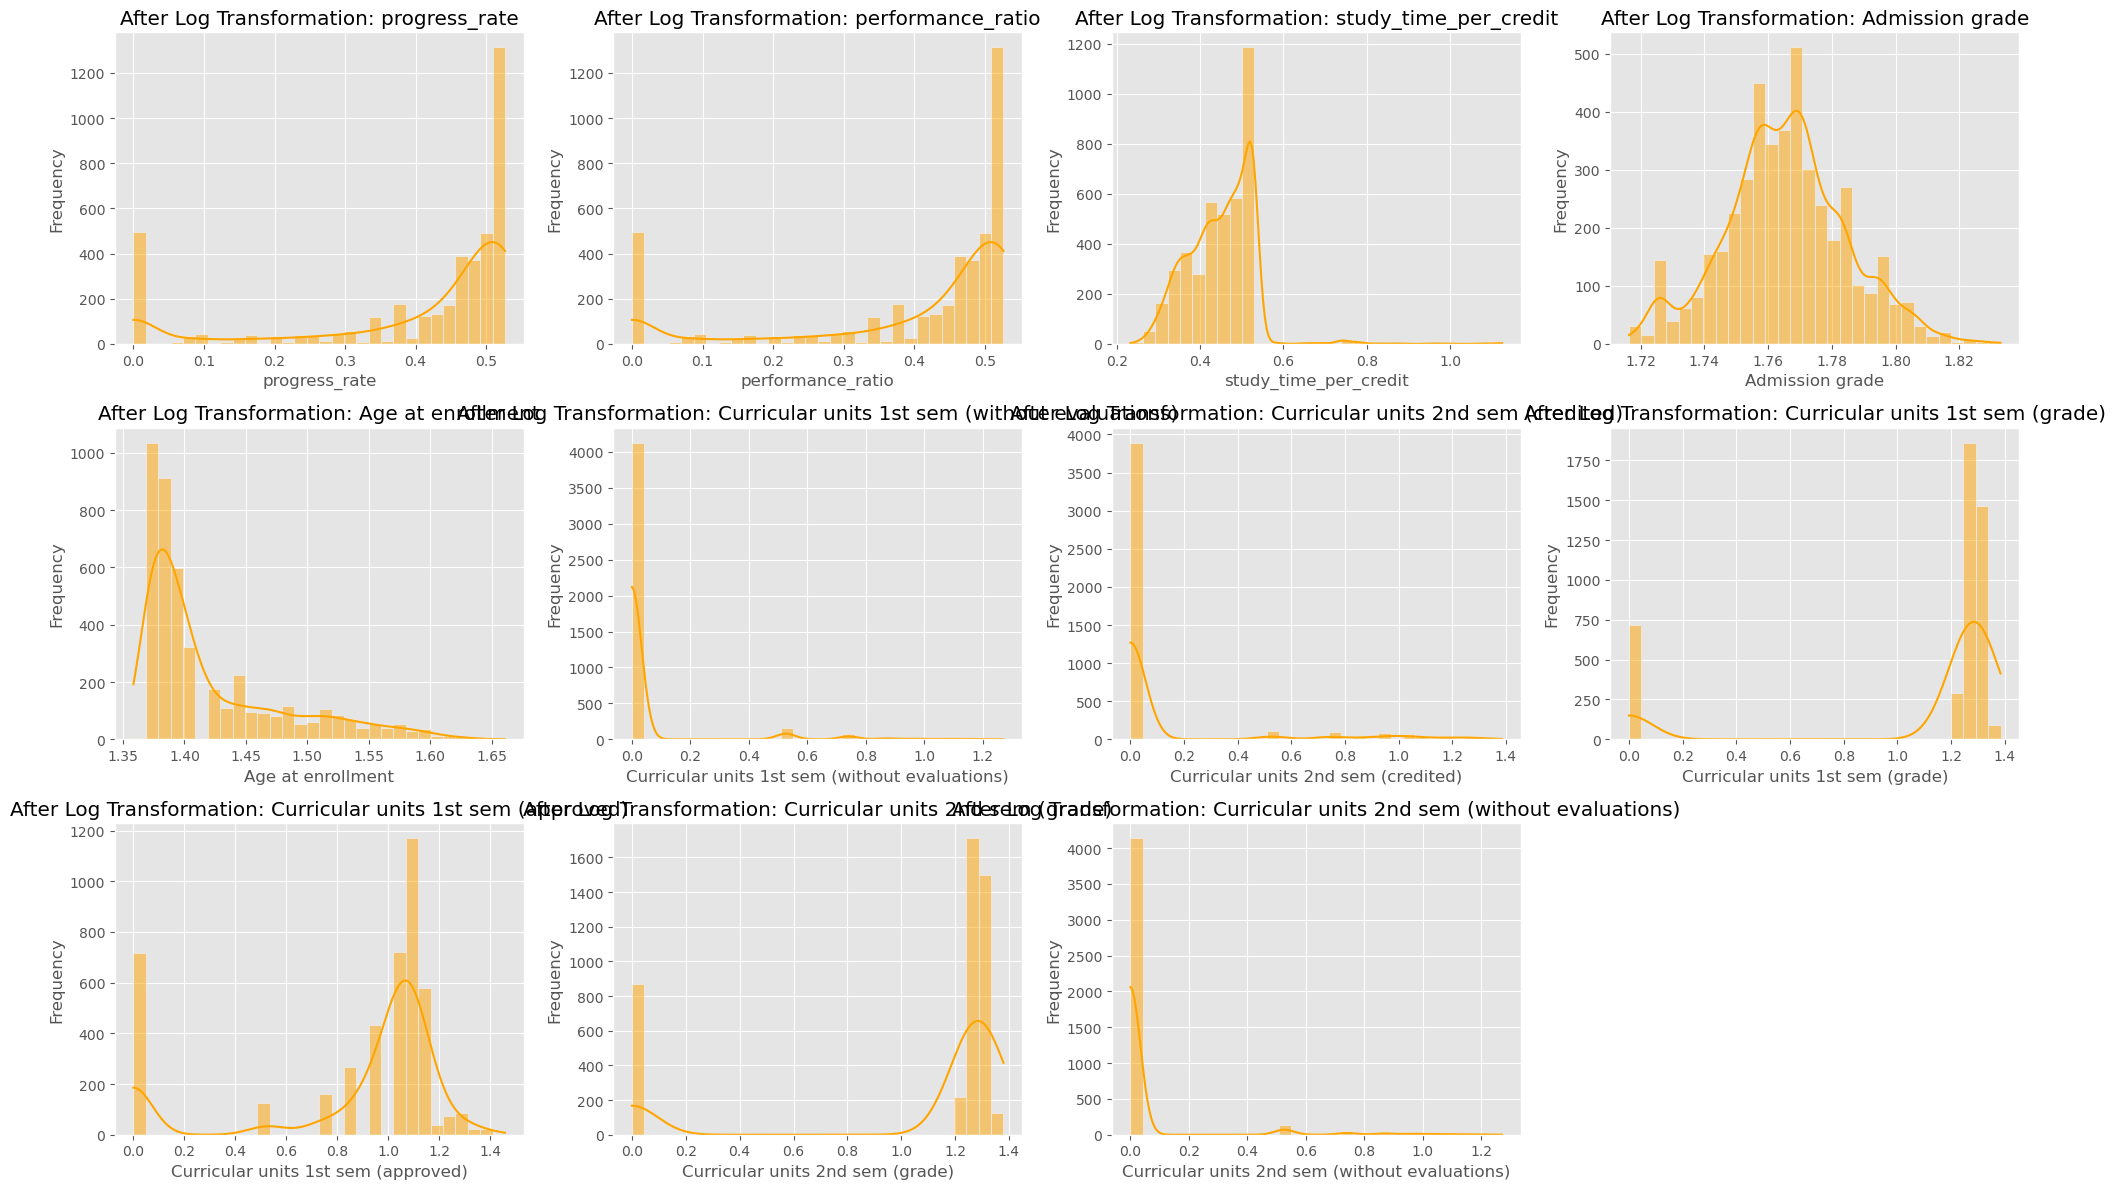

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of skewed numerical columns
skewed_columns = [
    'progress_rate', 
    'performance_ratio', 
    'study_time_per_credit',  
    'Admission grade', 
    'Age at enrollment', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

# Apply log transformation
for column in skewed_columns:
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        df[column] = np.log1p(df[column])  # Apply log transformation

# Plotting histograms after log transformation
plt.figure(figsize=(20, 12))

for i, column in enumerate(skewed_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f'After Log Transformation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [193]:
df['Admission grade'].describe()

count    4424.000000
mean        1.765503
std         0.019100
min         1.716380
25%         1.754107
50%         1.765582
75%         1.776846
max         1.832945
Name: Admission grade, dtype: float64

In [194]:
df['Age at enrollment'].describe()

count    4424.000000
mean        1.421725
std         0.059194
min         1.358505
25%         1.385227
50%         1.397363
75%         1.448822
max         1.660640
Name: Age at enrollment, dtype: float64

> #### ****b. Bin continuous variables into categorical ones where appropriate****

In [195]:
# Binning Admission Grade into 'Low', 'Average', 'High', 'Excellent'
bins_admission = [1.716, 1.754, 1.766, 1.777, 1.800]  # Added an extra upper limit for the last bin
labels_admission = ['Low', 'Average', 'High', 'Excellent']
df['admission_grade_category'] = pd.cut(df['Admission grade'], bins=bins_admission, labels=labels_admission)

# Define bins using the provided statistics for Age at Enrollment
bins_age = [1.358505, 1.385227, 1.397363, 1.448822, 1.660640]
labels_age = ['Min-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Max']
df['age_group'] = pd.cut(df['Age at enrollment'], bins=bins_age, labels=labels_age, include_lowest=True)

# Binning Unemployment Rate into 'Low', 'Moderate', 'High'
bins_unemployment = [0, 10, 14, 20]  
labels_unemployment = ['Low', 'Moderate', 'High']
df['unemployment_category'] = pd.cut(df['Unemployment rate'], bins=bins_unemployment, labels=labels_unemployment)

# Binning the marital status into broader categories with specific labels
df['marital_status_group'] = df['Marital status'].replace({
    0: 'Single',
    1: 'Married',
    2: 'Divorced',  # Keeping individual labels for Divorced, Widowed, and Separated
    3: 'Widowed',
    4: 'Separated'
})

# Print the first few rows to check the changes
print(df[['Admission grade', 'admission_grade_category', 'Age at enrollment', 'age_group', 'Unemployment rate', 
          'unemployment_category', 'Marital status', 'marital_status_group']].head())

   Admission grade admission_grade_category  Age at enrollment age_group  \
0         1.767189                     High           1.397363     Q2-Q3   
1         1.786133                Excellent           1.385227    Min-Q1   
2         1.763822                  Average           1.385227    Min-Q1   
3         1.756560                  Average           1.397363     Q2-Q3   
4         1.784960                Excellent           1.574565    Q3-Max   

   Unemployment rate unemployment_category  Marital status  \
0               10.8              Moderate               1   
1               13.9              Moderate               1   
2               10.8              Moderate               1   
3                9.4                   Low               1   
4               13.9              Moderate               2   

  marital_status_group  
0              Married  
1              Married  
2              Married  
3              Married  
4             Divorced  


> #### ****c. Standardize numerical features****

In [196]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure you have the numerical columns identified
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Check for NaN values in the numerical columns
print("NaN values in DataFrame:")
print(df[numerical_columns].isna().sum())

# Check for Infinite values in the numerical columns
print("\nInfinite values in DataFrame before handling:")
print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Handling NaN values by filling with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Replace infinite values with the maximum finite value in each column
for col in numerical_columns:
    # Replace infinite values
    df[col].replace([np.inf, -np.inf], df[col][np.isfinite(df[col])].max(), inplace=True)

# Set a threshold for excessively large values (adjust based on your data context)
threshold = 1e10  # Example threshold, adjust as needed

# Replace excessively large values with the maximum finite value
for col in numerical_columns:
    df[col] = np.where(np.abs(df[col]) > threshold, df[col][np.isfinite(df[col])].max(), df[col])

# # Recheck for NaN and Infinite values
# print("\nNaN values in DataFrame after handling:")
# print(df[numerical_columns].isna().sum())

# print("\nInfinite values in DataFrame after handling:")
# print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the first few rows to check the changes
print(df[numerical_columns].head())

NaN values in DataFrame:
Marital status                                      0
Application mode                                    0
Application order                                   0
Course                                              0
Daytime/evening attendance\t                        0
Previous qualification                              0
Previous qualification (grade)                      0
Nacionality                                         0
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                                 0
Father's occupation                                 0
Admission grade                                     0
Displaced                                           0
Educational special needs                           0
Debtor                                              0
Tuition fees up to date                             0
Gender                                              0
Sch

In [197]:
df1 = df.copy()
df1.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Target,study_time_per_credit,performance_ratio,dropout_risk,scholarship_fee_status,progress_rate,admission_grade_category,age_group,unemployment_category,marital_status_group
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,Dropout,3.171151,0.000000,-0.242652,-0.558901,0.000000,High,Q2-Q3,Moderate,Married
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,Graduate,0.127309,0.747364,-0.242652,-0.558901,0.747364,Excellent,Min-Q1,Moderate,Married
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,Dropout,3.171151,-2.328712,-0.242652,-0.558901,-2.328712,Average,Min-Q1,Moderate,Married


## ****3. Feature Selection****

#### ****a. Implement filter methods (e.g., correlation analysis, chi-square test)****

> ##### ****The filter method in feature selection serves as a way to evaluate and select features based on their intrinsic properties, rather than relying on a specific predictive model like wrapper methods do.****

In [198]:
df1.shape

(4424, 46)

In [199]:
df1.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [200]:
if 'Target' in df1.columns:
    print("Target column is present.")
else:
    print("Target column not found.")

Target column is present.


In [201]:
print(df1['Target'].dtype)

object


In [202]:
# Convert 'Target' to category type
df1['Target'] = df1['Target'].astype('category')

# Check the data type
print("Data type of 'Target' after conversion:", df1['Target'].dtype)

Data type of 'Target' after conversion: category


In [203]:
df1.Target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: Target
Non-Null Count  Dtype   
--------------  -----   
4424 non-null   category
dtypes: category(1)
memory usage: 4.6 KB


In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   float64 
 1   Application mode                                4424 non-null   float64 
 2   Application order                               4424 non-null   float64 
 3   Course                                          4424 non-null   float64 
 4   Daytime/evening attendance	                     4424 non-null   float64 
 5   Previous qualification                          4424 non-null   float64 
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   float64 
 8   Mother's qualification                          4424 non-null   float64 
 9   Father's qualification        

> #### ****Chi-square Test****

In [214]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Specify the target variable
target_variable = 'Target'  # Update with your actual target column

# Step 1: Check the DataFrame content
print("DataFrame Head:\n", df1.head())
print("\nDataFrame Info:\n", df1.info())

# Step 2: Handle NaN values
df1.dropna(subset=df1.select_dtypes(include=['object', 'category']).columns, inplace=True)  # Drop rows with NaN in categorical features
df1.dropna(subset=[target_variable], inplace=True)  # Drop rows with NaN in target variable

# Step 3: Convert categorical features to string
categorical_features = df1.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert mixed-type columns to strings
for feature in categorical_features:
    df1[feature] = df1[feature].astype(str)

# Step 4: Apply LabelEncoder to categorical features
encoder = LabelEncoder()

# Encode each categorical feature into numeric values
for feature in categorical_features:
    df1[feature] = encoder.fit_transform(df1[feature])

# Ensure the target variable is categorical and encoded as well
if df1[target_variable].dtype == 'object':
    df1[target_variable] = encoder.fit_transform(df1[target_variable])

# Step 5: Prepare Features and Target for Chi-Square Test
X = df1[categorical_features]  # Input categorical features
y = df1[target_variable]       # Target variable

# Check for NaN values in X and y
print("NaN values in features:\n", X.isnull().sum())
print("NaN values in target:\n", y.isnull().sum())

# Step 6: Perform Chi-Square Test
chi_scores, p_values = chi2(X, y)

# Create a DataFrame to display chi-square test results
chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi-Square Score': chi_scores,
    'p-Value': p_values
})
chi2_results.sort_values(by='Chi-Square Score', ascending=False, inplace=True)

print("\nChi-Square Test Results:\n", chi2_results)

# Step 7: Save chi-square test results
chi_square_path = 'chi_square_results.csv'  # Update with your desired output path
chi2_results.to_csv(chi_square_path, index=False)
print(f"Chi-Square results saved to {chi_square_path}")

DataFrame Head:
    Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298               -1.189759 

ValueError: at least one array or dtype is required

> #### ****Correlation Analysis****

In [206]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Print DataFrame columns to debug
print("DataFrame Columns:\n", df1.columns.tolist())

# Specify the target variable
target_variable = 'Target'  # Update with your actual target column if it's different

# Check if the target variable exists in the DataFrame
if target_variable not in df1.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")

# Step 1: Handle NaN values in numerical columns
df1.dropna(subset=df1.select_dtypes(include=['float64', 'int64']).columns, inplace=True)  # Drop rows with NaN in numerical features
df1.dropna(subset=[target_variable], inplace=True)  # Drop rows with NaN in target variable

# Step 2: Convert the target variable to numerical values
label_encoder = LabelEncoder()
df1[target_variable] = label_encoder.fit_transform(df1[target_variable])

# Step 3: Select numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 4: Calculate correlations with the target variable
correlations = df1[numerical_columns].corr()[target_variable].abs()

# Step 5: Filter features based on a correlation threshold
threshold = 0.1  # Set your desired threshold
selected_numerical_features = correlations[correlations > threshold].index.tolist()

# Step 6: Create a DataFrame for results
correlation_results = pd.DataFrame({
    'Feature': selected_numerical_features,
    'Correlation Coefficient': correlations[selected_numerical_features]
})

correlation_results.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

print("\nCorrelation Analysis Results:\n", correlation_results)

# Step 7: Save correlation results
correlation_path = 'correlation_results.csv'  # Update with your desired output path
correlation_results.to_csv(correlation_path, index=False)
print(f"Correlation results saved to {correlation_path}")

DataFrame Columns:
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', '

> #### ****b. Apply wrapper methods (e.g., recursive feature elimination)****

> ****Applying wrapper methods like Recursive Feature Elimination (RFE) to your DataFrame df1 serves the purpose of feature selection, which helps you identify and retain the most important features for your predictive modeling tasks.****

In [207]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load your dataset
# df1 = pd.read_csv('your_data.csv')  # Uncomment and update with your data file

# Specify the target variable
target_variable = 'Target'  # Update with your actual target column if it's different

# Check if the target variable exists in the DataFrame
if target_variable not in df1.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")

# Step 1: Handle NaN values in numerical columns
df1.dropna(subset=df1.select_dtypes(include=['float64', 'int64']).columns, inplace=True)  # Drop rows with NaN in numerical features
df1.dropna(subset=[target_variable], inplace=True)  # Drop rows with NaN in target variable

# Step 2: Convert the target variable to numerical values
label_encoder = LabelEncoder()
df1[target_variable] = label_encoder.fit_transform(df1[target_variable])

# Step 3: Select numerical columns for features
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 4: Prepare features and target variable
X = df1[numerical_columns].drop(columns=[target_variable])
y = df1[target_variable]

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define the model
model = LogisticRegression()

# Step 7: Apply RFE
selector = RFE(estimator=model, n_features_to_select=5)  # Set the number of features to select
selector = selector.fit(X_train, y_train)

# Step 8: Get selected features
selected_features = X.columns[selector.support_]
print("Selected Features:\n", selected_features)

# Step 9: Save selected features to a new DataFrame df2
df2 = pd.DataFrame(X[selected_features].values, columns=selected_features)
print("Selected features saved to df2:")
print(df2.head())  # Display the first few rows of df2 to verify

Selected Features:
 Index(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'study_time_per_credit', 'performance_ratio', 'progress_rate'],
      dtype='object')
Selected features saved to df2:
   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                         -2.268811                         -2.018786   
1                          0.495225                          0.532798   
2                         -2.268811                         -2.018786   
3                          0.473016                          0.484263   
4                          0.427143                          0.507951   

   study_time_per_credit  performance_ratio  progress_rate  
0               3.171151           0.000000       0.000000  
1               0.127309           0.747364       0.747364  
2               3.171151          -2.328712      -2.328712  
3              -0.452459           0.598652       0.598652  
4              -0.199629        

In [208]:
df2 = df1.copy()
df2.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Target,study_time_per_credit,performance_ratio,dropout_risk,scholarship_fee_status,progress_rate,admission_grade_category,age_group,unemployment_category,marital_status_group
0,-0.294829,-0.095470,2.490896,-4.20952,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,0,3.171151,0.000000,-0.242652,-0.558901,0.000000,2,1,2,3
1,-0.294829,-0.209869,-0.554068,0.19258,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,2,0.127309,0.747364,-0.242652,-0.558901,0.747364,1,0,2,3


In [210]:
df2.shape

(4226, 46)

> #### ****c. Use embedded methods (e.g., Lasso, Random Forest importance)****
>
> Embedded methods combine feature selection with model training. They build a model and select features simultaneously, often using algorithms that include built-in feature importance metrics.

> #### ****Lasso Regression****
>
> Will help you select features based on their coefficients.
> ****The coefficient refers to the weight or multiplier assigned to each feature (independent variable) in a regression model. These coefficients represent the impact that each feature has on predicting the target variable.****

In [215]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Step 1: Prepare your DataFrame (Assuming 'Target' is your target variable)
X = df1.drop(columns=['Target'])  # Features
y = df1['Target']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and fit Lasso model
lasso = LassoCV(cv=5)  # Cross-validation with 5 folds
lasso.fit(X_train, y_train)

# Step 4: Get the selected features
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
selected_features_lasso = lasso_coef[lasso_coef != 0].index.tolist()

print("Selected features from Lasso Regression:", selected_features_lasso)

Selected features from Lasso Regression: ['Marital status', 'Application mode', 'Application order', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'study_time_per_credit', 'performance_ratio', 'dropout_risk', 'scholarship_fee_status', 'progress_rate', 'admission_grade_category', 'age_group', 

> #### ****Random Forest****
>
> Will provide a ranking of feature importance based on the model's internal structure.

In [216]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize and fit Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Get feature importances
importances = rf.feature_importances_

# Step 3: Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Step 4: Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 5: Get the selected features based on a threshold (e.g., importance > 0.05)
selected_features_rf = feature_importances[feature_importances['Importance'] > 0.05]['Feature'].tolist()

print("Selected features from Random Forest:", selected_features_rf)

Selected features from Random Forest: ['progress_rate', 'performance_ratio', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)']


> ##### ****Saving the selected features****

In [217]:
# Combine selected features from both methods
selected_features_combined = list(set(selected_features_lasso + selected_features_rf))

# Create a DataFrame for the selected features
df2 = pd.DataFrame(selected_features_combined, columns=['Selected Features'])

# Save to CSV with updated file name
selected_features_path = 'lasso_rf_sel_features.csv'  # Updated output path
df2.to_csv(selected_features_path, index=False)
print(f"Selected features saved to {selected_features_path}")

Selected features saved to lasso_rf_sel_features.csv


> #### ****d. Perform stability selection to identify robust feature subsets****

> ##### ****Stability selection is a feature selection method that improves model robustness by identifying features that are consistently important across multiple data samples. It helps mitigate overfitting, handles data variability, and ensures that selected features are reliable and generalizable to new data. This process enhances model interpretability, reduces complexity, and improves overall performance by focusing on truly informative features.****

In [218]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# 'Selected Features' is the column name in df2 for these features
selected_feature_names = df2['Selected Features'].tolist()

# Extract the data from df1 based on the selected features in df2
X = df1[selected_feature_names]  # Subset of df1 with the selected features from df2
y = df1['Target']                # Define the target variable

# Scale the features (Lasso can be sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize parameters
n_bootstraps = 100       # Number of bootstrap samples
alpha = 0.01             # Regularization strength for Lasso
selection_counts = np.zeros(X.shape[1])  # To track how often each feature is selected

# Perform bootstrapping and feature selection
for i in range(n_bootstraps):
    # Sample the data with replacement (bootstrap)
    X_bootstrap, y_bootstrap = resample(X_scaled, y)
    
    # Perform Lasso on the bootstrap sample
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_bootstrap, y_bootstrap)
    
    # Check which features were selected (non-zero coefficients)
    selected = np.where(lasso.coef_ != 0)[0]
    
    # Update selection counts for selected features
    selection_counts[selected] += 1

# Normalize selection counts by number of bootstraps
selection_freq = selection_counts / n_bootstraps

# Define a threshold for stability selection (e.g., features selected in at least 50% of bootstraps)
threshold = 0.5
stable_features = np.where(selection_freq >= threshold)[0]

# Get the corresponding feature names from df2
stable_feature_names = [selected_feature_names[i] for i in stable_features]

# Create a DataFrame for stable features
df_stable_features = pd.DataFrame(stable_feature_names, columns=['Stable Features'])

# Save to CSV (optional)
stable_features_path = 'stable_features.csv'
df_stable_features.to_csv(stable_features_path, index=False)
print(f"Stable features saved to {stable_features_path}")

# Output the stable features
print("\nStable Features:\n", stable_feature_names)

Stable features saved to stable_features.csv

Stable Features:
 ['Previous qualification', "Mother's occupation", 'study_time_per_credit', 'progress_rate', 'Curricular units 2nd sem (enrolled)', 'Application mode', 'Age at enrollment', 'Curricular units 2nd sem (evaluations)', 'Gender', 'International', 'Admission grade', 'age_group', 'Displaced', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Tuition fees up to date', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)', 'Debtor', 'Curricular units 2nd sem (approved)', 'scholarship_fee_status', 'Curricular units 1st sem (evaluations)']


> ## ****4. Dimensionality Reduction****
>
> Dimensionality reduction is a technique used to reduce the number of input variables or features in a dataset while retaining as much important information as possible. It helps simplify the model, improve computational efficiency, and reduce the risk of overfitting. Popular methods include Principal Component Analysis (PCA) and t-SNE, which transform high-dimensional data into a lower-dimensional space while preserving essential patterns and relationships. Dimensionality reduction is crucial when dealing with large datasets, as it helps improve model performance, interpretability, and visualization of complex data.

> #### ****PCA****

In [220]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Step 1: Identify and transform categorical columns using OneHotEncoding
categorical_columns = df2.select_dtypes(include=['object']).columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

# Step 2: Standardize the data (after encoding)
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_encoded)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
df2_pca = pca.fit_transform(df2_scaled)

# Step 4: Create a DataFrame with the principal components
pca_df = pd.DataFrame(df2_pca, columns=[f'PC{i+1}' for i in range(df2_pca.shape[1])])

# Step 5: View explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each principal component: {explained_variance}")

# Step 6: Save PCA results (optional)
pca_results_path = 'pca_results.csv'
pca_df.to_csv(pca_results_path, index=False)
print(f"PCA results saved to {pca_results_path}")

Explained Variance by each principal component: [0.02700831 0.02700831]
PCA results saved to pca_results.csv


> #### ****Implement t-SNE for visualization of high-dimensional data****

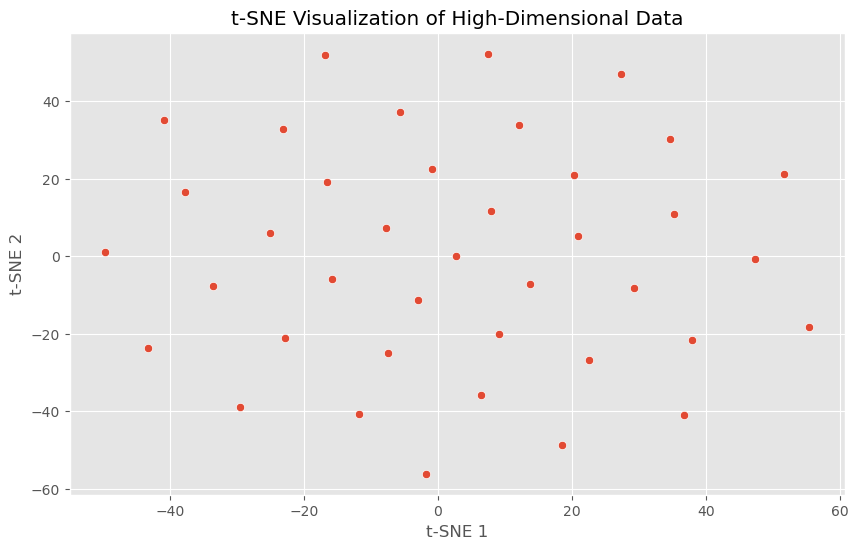

In [223]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify and transform categorical columns using OneHotEncoding
categorical_columns = df2.select_dtypes(include=['object']).columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

# Step 2: Standardize the data (after encoding)
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_encoded)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
df2_tsne = tsne.fit_transform(df2_scaled)

# Step 4: Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(df2_tsne, columns=['t-SNE 1', 't-SNE 2'])

# Step 5: Plot the t-SNE results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of High-Dimensional Data')
plt.show()

> The image depicts a **t-SNE (t-distributed Stochastic Neighbor Embedding)** visualization of high-dimensional data, reducing it to two dimensions for easier interpretation. The plot features points scattered across the axes labeled **"t-SNE 1"** and **"t-SNE 2,"** highlighting potential clusters and outliers. The title indicates its purpose, showcasing how complex datasets can be represented visually. This technique is useful for identifying patterns and relationships within the data.
